In [1]:
import pyAgrum as gum

In [2]:
model = gum.BayesNet()
model.loadBIF("CRC_BN.bif")

'CRC_BN.bif:5: 21 : warning : Warning : Properties are not supported yet\n    property weight = None ;\n                    ^\nCRC_BN.bif:9: 21 : warning : Warning : Properties are not supported yet\n    property weight = None ;\n                    ^\nCRC_BN.bif:13: 21 : warning : Warning : Properties are not supported yet\n    property weight = None ;\n                    ^\nCRC_BN.bif:17: 21 : warning : Warning : Properties are not supported yet\n    property weight = None ;\n                    ^\nCRC_BN.bif:21: 21 : warning : Warning : Properties are not supported yet\n    property weight = None ;\n                    ^\nCRC_BN.bif:25: 21 : warning : Warning : Properties are not supported yet\n    property weight = None ;\n                    ^\nCRC_BN.bif:29: 21 : warning : Warning : Properties are not supported yet\n    property weight = None ;\n                    ^\nCRC_BN.bif:33: 21 : warning : Warning : Properties are not supported yet\n    property weight = None ;\n        

In [3]:
print(model.variable("Age"))


Age:Labelized({age_2_young|age_3_young_adult|age_4_adult|age_5_old_adult})


In [4]:
print(model.variable("Age").domain().replace("2_young", "age_2_young"))

{age_age_2_young|age_3_young_adult|age_4_adult|age_5_old_adult}


In [5]:
model.saveXDSL('CRC_BN.xdsl')

In [6]:
model_ID = gum.InfluenceDiagram()
model_ID.loadBIFXML("CRC_BN.xml")

True

In [7]:
model_ID.addDecisionNode

<bound method InfluenceDiagram.addDecisionNode of (pyAgrum.InfluenceDiagram<double>@0000015BA42FF1C0) Influence Diagram{
  chance: 14,
  utility: 0,
  decision: 0,
  arcs: 48,
  domainSize: 221184
}>

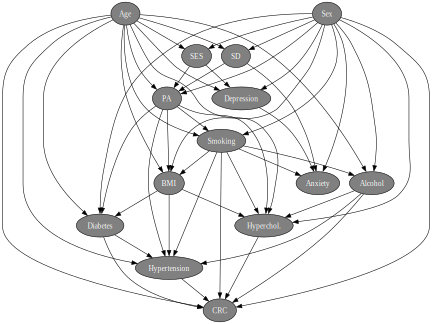

In [8]:
import pyAgrum.lib.notebook as gnb
gnb.showInfluenceDiagram(model_ID)

In [53]:
screening = model_ID.addDecisionNode(gum.LabelizedVariable("Screening", "Screening", 3))
utility = model_ID.addUtilityNode(gum.LabelizedVariable("Utility", "Utility", 1))
# cost = model_ID.addUtilityNode(gum.LabelizedVariable("Screening_Cost", "Screening_Cost", 1))
diagnose = model_ID.addChanceNode(gum.LabelizedVariable("Report", "Report", 2))

In [54]:
model_ID.addArc(model_ID.idFromName("Alcohol"), screening)
'''model_ID.addArc(model_ID.idFromName("Hyperchol."), screening)
model_ID.addArc(model_ID.idFromName("Hypertension"), screening)'''
model_ID.addArc(model_ID.idFromName("Diabetes"), screening)
model_ID.addArc(model_ID.idFromName("Smoking"), screening)
model_ID.addArc(model_ID.idFromName("Age"), screening)

model_ID.addArc(screening, diagnose)
# model_ID.addArc(screening, cost)

model_ID.addArc(model_ID.idFromName("CRC"), diagnose)

model_ID.addArc(diagnose, utility)
model_ID.addArc(screening, utility)
model_ID.addArc(model_ID.idFromName("CRC"), utility)
# model_ID.addArc(model_ID.idFromName("Age"), utility)

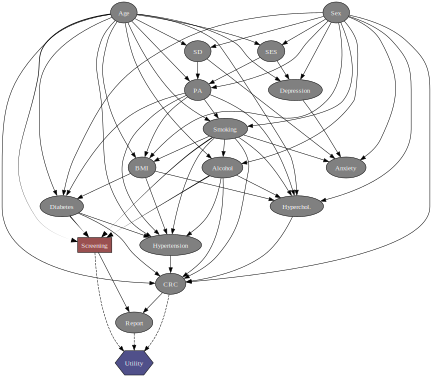

In [55]:
gnb.showInfluenceDiagram(model_ID)

In [68]:
model_ID.cpt("Diagnose")[{"Screening":0, "CRC":True}] = [0.05, 0.95]
model_ID.cpt("Diagnose")[{"Screening":0, "CRC":False}] = [0.99, 0.01]
model_ID.cpt("Diagnose")[{"Screening":1, "CRC":True}] = [0.20, 0.80]
model_ID.cpt("Diagnose")[{"Screening":1, "CRC":False}] = [0.95, 0.05]
model_ID.cpt("Diagnose")[{"Screening":2, "CRC":True}] = [1, 0]
model_ID.cpt("Diagnose")[{"Screening":2, "CRC":False}] = [1, 0]

In [69]:
model_ID.cpt("Diagnose")

(pyAgrum.Potential<double>@0000023E8D74A7B0) 
             ||  Diagnose         |
Screen|CRC   ||0        |1        |
------|------||---------|---------|
0     |False || 0.9900  | 0.0100  |
1     |False || 0.9500  | 0.0500  |
2     |False || 1.0000  | 0.0000  |
0     |True  || 0.0500  | 0.9500  |
1     |True  || 0.2000  | 0.8000  |
2     |True  || 1.0000  | 0.0000  |

In [80]:
model_ID.utility(cost)[{}] = [[-300], [-20], [0]]
model_ID.utility(utility)[{}] = [[[[200], [-250]], [[-500], [10000]]],
                                 [[[200], [-200]], [[-450], [9000]]],
                                 [[[200], [-150]], [[-400], [8000]]],
                                 [[[200], [-100]], [[-350], [7000]]]]

In [81]:
model_ID.utility(utility)

(pyAgrum.Potential<double>@0000023E8D74A2B0) 
                    ||  Utility|
Diagno|CRC   |Age   ||0        |
------|------|------||---------|
0     |False |age_2_|| 200.0000|
1     |False |age_2_|| -250.0000|
0     |True  |age_2_|| -500.0000|
1     |True  |age_2_|| 10000.0000|
0     |False |age_3_|| 200.0000|
1     |False |age_3_|| -200.0000|
[...4 more line(s) ...]
0     |True  |age_4_|| -400.0000|
1     |True  |age_4_|| 8000.0000|
0     |False |age_5_|| 200.0000|
1     |False |age_5_|| -100.0000|
0     |True  |age_5_|| -350.0000|
1     |True  |age_5_|| 7000.0000|

In [82]:
model_ID.utility(cost)

,Screening_Cost
Screening,0
0,-300.0000
1,-20.0000
2,0.0000


In [83]:
model_ID.variable("Screening").labels()

('0', '1', '2')

In [84]:
gnb.flow.row(model_ID,gnb.getInference(model_ID))

In [85]:
ie=gum.ShaferShenoyLIMIDInference(model_ID)

In [86]:
id_inference = gum.ShaferShenoyLIMIDInference(model_ID)
id_inference.makeInference()


In [87]:
id_inference.optimalDecision("Screening")

(pyAgrum.Potential<double>@0000023E8D5DD2E0) 
                           ||  Screening                  |
Smokin|Diabet|Alcoho|Age   ||0        |1        |2        |
------|------|------|------||---------|---------|---------|
smok_1|False |high  |age_2_|| 0.0000  | 0.0000  | 1.0000  |
smok_2|False |high  |age_2_|| 0.0000  | 0.0000  | 1.0000  |
smok_3|False |high  |age_2_|| 0.0000  | 0.0000  | 1.0000  |
smok_1|True  |high  |age_2_|| 0.0000  | 0.0000  | 1.0000  |
smok_2|True  |high  |age_2_|| 0.0000  | 0.0000  | 1.0000  |
smok_3|True  |high  |age_2_|| 0.0000  | 0.0000  | 1.0000  |
[...36 more line(s) ...]
smok_1|False |low   |age_5_|| 0.0000  | 0.0000  | 1.0000  |
smok_2|False |low   |age_5_|| 0.0000  | 0.0000  | 1.0000  |
smok_3|False |low   |age_5_|| 0.0000  | 0.0000  | 1.0000  |
smok_1|True  |low   |age_5_|| 0.0000  | 0.0000  | 1.0000  |
smok_2|True  |low   |age_5_|| 0.0000  | 0.0000  | 1.0000  |
smok_3|True  |low   |age_5_|| 0.0000  | 0.0000  | 1.0000  |

In [88]:
id_inference.MEU()

{'mean': 199.57804773264982, 'variance': 248.67889116366132}

In [89]:
gnb.flow.row(model_ID,gnb.getInference(model_ID, evs = {"Age": "age_4_adult", "Diabetes":True, "Alcohol": "high", "CRC": True}))